In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)


In [2]:
# df =  pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease/thyroid0387.data")

In [3]:
# df.to_excel('datathy.xlsx')

In [4]:
df = pd.read_excel('datathy.xlsx')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9171 entries, 0 to 9170
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    9171 non-null   int64 
 1   29            9171 non-null   int64 
 2   F             9171 non-null   object
 3   f             9171 non-null   object
 4   f.1           9171 non-null   object
 5   f.2           9171 non-null   object
 6   f.3           9171 non-null   object
 7   f.4           9171 non-null   object
 8   f.5           9171 non-null   object
 9   f.6           9171 non-null   object
 10  t             9171 non-null   object
 11  f.7           9171 non-null   object
 12  f.8           9171 non-null   object
 13  f.9           9171 non-null   object
 14  f.10          9171 non-null   object
 15  f.11          9171 non-null   object
 16  f.12          9171 non-null   object
 17  t.1           9171 non-null   object
 18  0.3           9171 non-null   object
 19  f.13  

In [6]:
df

,Unnamed: 0,29,F,f,f.1,f.2,f.3,f.4,f.5,f.6,t,f.7,f.8,f.9,f.10,f.11,f.12,t.1,0.3,f.13,?,f.14,?.1,f.15,?.2,f.16,?.3,f.17,?.4,other,-[840801013]
0,0,29,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.6,t,1.9,t,128,f,?,f,?,f,?,other,-[840801014]
1,1,41,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,11,other,-[840801042]
2,2,36,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,26,other,-[840803046]
3,3,32,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,36,other,S[840803047]
4,4,60,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,26,other,-[840803048]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9166,9166,56,M,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,?,f,?,t,64,t,0.83,t,77,f,?,SVI,-[870119022]
9167,9167,22,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,t,91,t,0.92,t,99,f,?,SVI,-[870119023]
9168,9168,69,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,t,113,t,1.27,t,89,f,?,SVI,I[870119025]
9169,9169,47,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,t,75,t,0.85,t,88,f,?,other,-[870119027]


In [7]:
df.drop(columns='Unnamed: 0',inplace=True)

In [8]:
df["outcome"] = df["-[840801013]"].str[0]
df.drop(columns="-[840801013]", inplace=True)

In [9]:
df

,29,F,f,f.1,f.2,f.3,f.4,f.5,f.6,t,f.7,f.8,f.9,f.10,f.11,f.12,t.1,0.3,f.13,?,f.14,?.1,f.15,?.2,f.16,?.3,f.17,?.4,other,outcome
0,29,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.6,t,1.9,t,128,f,?,f,?,f,?,other,-
1,41,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,11,other,-
2,36,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,26,other,-
3,32,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,36,other,S
4,60,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,26,other,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9166,56,M,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,?,f,?,t,64,t,0.83,t,77,f,?,SVI,-
9167,22,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,t,91,t,0.92,t,99,f,?,SVI,-
9168,69,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,t,113,t,1.27,t,89,f,?,SVI,I
9169,47,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,t,75,t,0.85,t,88,f,?,other,-


In [10]:
dataset1 = df.rename(columns = {"29":"age", "F":"sex", "f":"thyroxine", "f.1":"query_thyroxine", "f.2":"medication","f.3":"sick", 
                        "f.4":"pregnant", "f.5":"surgery", "f.6":"I131_treatment", "t":"query_hypothyroid", 
                        "f.7":"query_hyperthyroid", "f.8":"lithium", "f.9":"goitre", "f.10":"tumor", "f.11":"hypopituitary", 
                        "f.12":"psych", "t.1":"TSH_measured","0.3":"TSH", "f.13":"T3_measured", "?":"T3", 
                        "f.14":"TT4_measured", "?.1":"TT4", "f.15":"T4U_measured", "?.2":"T4U", "f.16":"FTI_measured", 
                        "?.3":"FTI", "f.17":"TBG_measured", "?.4":"TBG", "other":"referral_source"})

In [11]:
dataset1

,age,sex,thyroxine,query_thyroxine,medication,sick,pregnant,surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,outcome
0,29,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.6,t,1.9,t,128,f,?,f,?,f,?,other,-
1,41,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,11,other,-
2,36,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,26,other,-
3,32,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,36,other,S
4,60,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,26,other,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9166,56,M,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,?,f,?,t,64,t,0.83,t,77,f,?,SVI,-
9167,22,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,t,91,t,0.92,t,99,f,?,SVI,-
9168,69,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,t,113,t,1.27,t,89,f,?,SVI,I
9169,47,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,t,75,t,0.85,t,88,f,?,other,-


In [12]:
dataset1['outcome'].value_counts()

-    6770
K     447
G     419
I     346
F     239
R     196
A     193
M     129
L     116
N     110
S      85
J      30
B      21
C      18
O      15
Q      14
D       9
H       8
P       5
E       1
Name: outcome, dtype: int64

In [13]:
# Replacing all possible disease outcomes into one category - "yes".
# our aim is to predict 'yes' or 'no'
list = ['S', 'F', 'A', 'R', 'I', 'M', 'N', 'G', 'K', 'L', 'Q', 'J',
       'C', 'O', 'H', 'D', 'P', 'B', 'E']
dataset1['outcome'].replace(to_replace=list, value="yes", inplace=True)

In [14]:
dataset1

,age,sex,thyroxine,query_thyroxine,medication,sick,pregnant,surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,outcome
0,29,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.6,t,1.9,t,128,f,?,f,?,f,?,other,-
1,41,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,11,other,-
2,36,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,26,other,-
3,32,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,36,other,yes
4,60,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,26,other,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9166,56,M,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,?,f,?,t,64,t,0.83,t,77,f,?,SVI,-
9167,22,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,t,91,t,0.92,t,99,f,?,SVI,-
9168,69,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,t,113,t,1.27,t,89,f,?,SVI,yes
9169,47,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,t,75,t,0.85,t,88,f,?,other,-


In [15]:
# Here outcome value = '-' means patient has no thyroid
# To convert outcome variables into binary format
dataset1.outcome.replace({"-":0, "yes":1}, inplace=True)

In [16]:
dataset1.columns

Index(['age', 'sex', 'thyroxine', 'query_thyroxine', 'medication', 'sick',
       'pregnant', 'surgery', 'I131_treatment', 'query_hypothyroid',
       'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary',
       'psych', 'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured',
       'TT4', 'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured',
       'TBG', 'referral_source', 'outcome'],
      dtype='object')

In [17]:
dataset1.isnull().sum()

age                   0
sex                   0
thyroxine             0
query_thyroxine       0
medication            0
sick                  0
pregnant              0
surgery               0
I131_treatment        0
query_hypothyroid     0
query_hyperthyroid    0
lithium               0
goitre                0
tumor                 0
hypopituitary         0
psych                 0
TSH_measured          0
TSH                   0
T3_measured           0
T3                    0
TT4_measured          0
TT4                   0
T4U_measured          0
T4U                   0
FTI_measured          0
FTI                   0
TBG_measured          0
TBG                   0
referral_source       0
outcome               0
dtype: int64

In [18]:
# replace null values which is given by '?' with nan
dataset1.replace({"?":np.nan}, inplace=True)
dataset1


,age,sex,thyroxine,query_thyroxine,medication,sick,pregnant,surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,outcome
0,29,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.6,t,1.9,t,128,f,NaN,f,NaN,f,NaN,other,0
1,41,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,t,11,other,0
2,36,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,t,26,other,0
3,32,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,t,36,other,1
4,60,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,t,26,other,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9166,56,M,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,NaN,f,NaN,t,64,t,0.83,t,77,f,NaN,SVI,0
9167,22,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,NaN,f,NaN,t,91,t,0.92,t,99,f,NaN,SVI,0
9168,69,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,NaN,f,NaN,t,113,t,1.27,t,89,f,NaN,SVI,1
9169,47,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,NaN,f,NaN,t,75,t,0.85,t,88,f,NaN,other,0


In [19]:
dataset1.shape

(9171, 30)

In [20]:
dataset1.drop(['TBG_measured','TBG','T3_measured','TSH_measured','TT4_measured','T4U_measured','FTI_measured'],axis=1,inplace=True)


In [21]:
dataset1.shape

(9171, 23)

In [22]:
dataset1.head(2)

,age,sex,thyroxine,query_thyroxine,medication,sick,pregnant,surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral_source,outcome
0,29,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,1.6,1.9,128,NaN,NaN,other,0
1,41,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,NaN,NaN,NaN,NaN,NaN,other,0


In [23]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9171 entries, 0 to 9170
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 9171 non-null   int64 
 1   sex                 8864 non-null   object
 2   thyroxine           9171 non-null   object
 3   query_thyroxine     9171 non-null   object
 4   medication          9171 non-null   object
 5   sick                9171 non-null   object
 6   pregnant            9171 non-null   object
 7   surgery             9171 non-null   object
 8   I131_treatment      9171 non-null   object
 9   query_hypothyroid   9171 non-null   object
 10  query_hyperthyroid  9171 non-null   object
 11  lithium             9171 non-null   object
 12  goitre              9171 non-null   object
 13  tumor               9171 non-null   object
 14  hypopituitary       9171 non-null   object
 15  psych               9171 non-null   object
 16  TSH                 8329

In [24]:
dataset1.describe()

,age,outcome
count,9171.000000,9171.000000
mean,73.560680,0.261804
std,1184.041182,0.439640
min,1.000000,0.000000
25%,37.000000,0.000000
50%,55.000000,0.000000
75%,68.000000,1.000000
max,65526.000000,1.000000


In [25]:
df_box =dataset1.copy()

In [26]:
dataset1.drop(dataset1[dataset1.age <20].index,inplace=True)

In [27]:
# there are some impractical values of age present in the data
# dataset[(dataset['age']<20) | (dataset['age'] > 100) ] 
# dataset1.drop(dataset1[dataset1.age <20 | dataset1.age >100].index,inplace=True)
dataset1.drop(dataset1[dataset1.age >100].index,inplace=True)

In [28]:
# plt.figure(figsize=(16,5))
# plt.subplot(1,2,1)
# df_box.boxplot('age',vert=False)
# plt.title('Before removing outliers')


# plt.subplot(1,2,2)
# dataset1.boxplot('age',vert =False)
# plt.title('After removing outliers')

In [29]:
#converting columns into float type
# dataset1[['TSH','T3','TT4','T4U','FTI']] =  dataset1[['TSH','T3','TT4','T4U','FTI']].astype(object)

In [30]:
dataset1.head(1)

,age,sex,thyroxine,query_thyroxine,medication,sick,pregnant,surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral_source,outcome
0,29,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,1.6,1.9,128,NaN,NaN,other,0


In [31]:
dataset1.dtypes

age                    int64
sex                   object
thyroxine             object
query_thyroxine       object
medication            object
sick                  object
pregnant              object
surgery               object
I131_treatment        object
query_hypothyroid     object
query_hyperthyroid    object
lithium               object
goitre                object
tumor                 object
hypopituitary         object
psych                 object
TSH                   object
T3                    object
TT4                   object
T4U                   object
FTI                   object
referral_source       object
outcome                int64
dtype: object

In [32]:
dataset1.isna().sum()

age                      0
sex                    288
thyroxine                0
query_thyroxine          0
medication               0
sick                     0
pregnant                 0
surgery                  0
I131_treatment           0
query_hypothyroid        0
query_hyperthyroid       0
lithium                  0
goitre                   0
tumor                    0
hypopituitary            0
psych                    0
TSH                    783
T3                    2450
TT4                    406
T4U                    758
FTI                    751
referral_source          0
outcome                  0
dtype: int64

In [33]:
dataset1[['TSH','T3','TT4','T4U','FTI']] =  dataset1[['TSH','T3','TT4','T4U','FTI']].astype(float)

In [34]:
dataset1[['TSH','T3','TT4','T4U','FTI']].dtypes

TSH    float64
T3     float64
TT4    float64
T4U    float64
FTI    float64
dtype: object

In [35]:
# plt.figure(figsize=(10,5))
# sns.boxplot(data= dataset1[['TSH','T3','TT4','T4U','FTI']])
# # column values contains a outliers so we can not use mean to fill missing values

In [36]:
dataset1[['TSH','T3','TT4','T4U','FTI']].median()

TSH      1.40
T3       1.90
TT4    104.00
T4U      0.96
FTI    109.00
dtype: float64

In [37]:
# filt  = lambda x: 0 if x == np.nan else x
# dataset['TSH'] = map(filt, dataset['TSH'])

In [38]:
# we fill missing values by using median
filt =( dataset1['TSH'].isna())
dataset1['TSH'] = np.where(filt,dataset1['TSH'].median(),dataset1['TSH'])

filt =( dataset1['T3'].isna())
dataset1['T3'] = np.where(filt,dataset1['T3'].median(),dataset1['T3'])

filt =( dataset1['TT4'].isna())
dataset1['TT4'] = np.where(filt,dataset1['TT4'].median() ,dataset1['TT4'])

filt =( dataset1['T4U'].isna())
dataset1['T4U'] = np.where(filt,dataset1['T4U'].median() ,dataset1['T4U'])

filt =( dataset1['FTI'].isna())
dataset1['FTI'] = np.where(filt,dataset1['FTI'].median() ,dataset1['FTI'])

filt =( dataset1['sex'].isna())
dataset1['sex'] = np.where(filt,dataset1['sex'].mode() ,dataset1['sex'])
           

In [39]:
dataset1.isna().sum()

age                   0
sex                   0
thyroxine             0
query_thyroxine       0
medication            0
sick                  0
pregnant              0
surgery               0
I131_treatment        0
query_hypothyroid     0
query_hyperthyroid    0
lithium               0
goitre                0
tumor                 0
hypopituitary         0
psych                 0
TSH                   0
T3                    0
TT4                   0
T4U                   0
FTI                   0
referral_source       0
outcome               0
dtype: int64

In [40]:
# sns.countplot(x='outcome',data=dataset1,hue = 'pregnant')

In [41]:
# dataset1[['TSH','T3','TT4','T4U','FTI']].plot(kind='box', figsize=(20,20),vert=False)


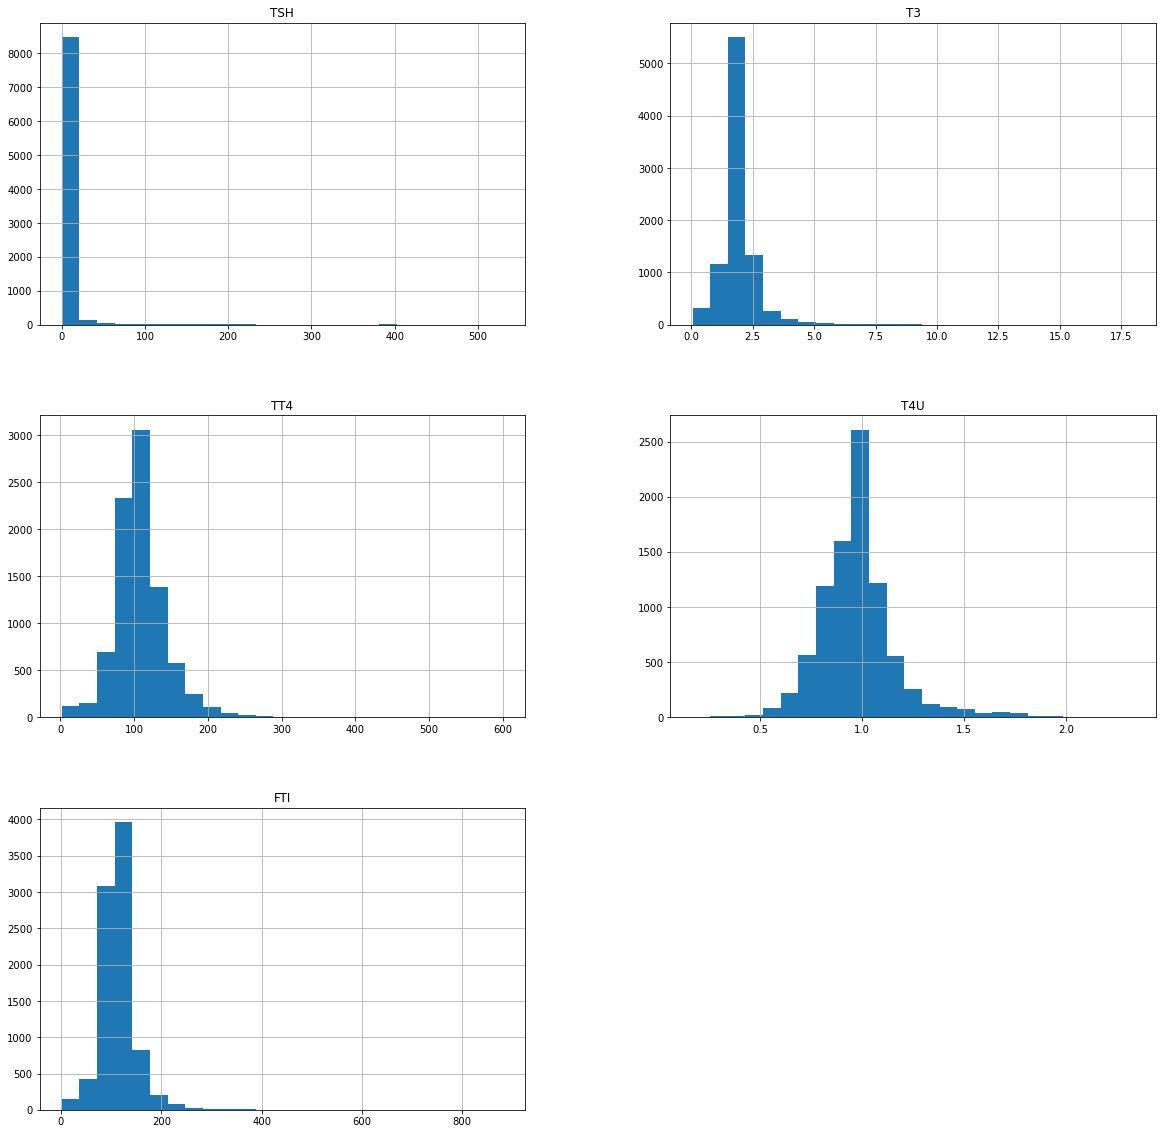

In [42]:
dataset1[['TSH','T3','TT4','T4U','FTI']].hist(bins=25,figsize=(20,20));

### The features 'T3', 'TT4' , 'T4U' , 'FTI'  are approximately  normally distributed so we can use Z-score method to remove outliers

In [43]:
# sns.distplot(dataset1.TSH,kde = True)

In [44]:
dataset1.describe()

,age,TSH,T3,TT4,T4U,FTI,outcome
count,8786.000000,8786.000000,8786.000000,8786.000000,8786.000000,8786.000000,8786.000000
mean,53.714318,4.627723,1.942464,108.467865,0.973834,113.301962,0.260642
std,17.595942,20.923992,0.750745,36.606361,0.190887,39.842914,0.439010
min,20.000000,0.005000,0.050000,2.000000,0.170000,1.400000,0.000000
25%,39.000000,0.560000,1.700000,88.000000,0.870000,95.000000,0.000000
50%,56.000000,1.400000,1.900000,104.000000,0.960000,109.000000,0.000000
75%,68.000000,2.500000,2.100000,124.000000,1.050000,126.000000,1.000000
max,97.000000,530.000000,18.000000,600.000000,2.330000,881.000000,1.000000


In [45]:
df_box =dataset1.copy()


In [46]:
q3, q1 = np.percentile(dataset1['TSH'], [75 ,25])
iqr = q3 - q1

In [47]:
upper_fence = q3 + (1.5 * iqr)

In [48]:
lower_fence = q1 -  (1.5 * iqr)

In [49]:
print(iqr,upper_fence,lower_fence)

1.94 5.41 -2.35


In [50]:
dataset1['TSH'] = np.where(dataset1['TSH']>=upper_fence,upper_fence,dataset1['TSH'])
# dataset1[dataset1['TSH']>upper_fence]

In [51]:
dataset1['TSH'] = np.where(dataset1['TSH']<=lower_fence,lower_fence,dataset1['TSH'])
# dataset1[dataset1['TSH']<=lower_fence]

In [52]:
# sns.boxplot(dataset1['TSH'])

C:\Users\DKG\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DKG\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


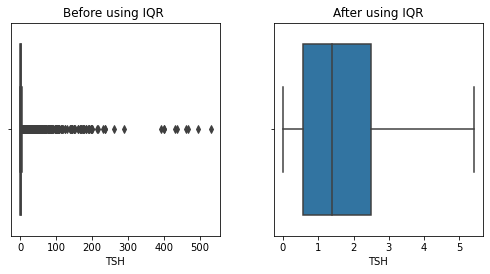

In [53]:
fig =plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
sns.boxplot(df_box['TSH'])
plt.title('Before using IQR ')

plt.subplot(1,2,2)
sns.boxplot(dataset1['TSH'])
plt.title('After using IQR')

fig.tight_layout(pad=5.0)
 
plt.show()
# dataset1['TSH'].plot(kind='box',vert=False,title='After removing outlier using IQR')

In [54]:

# dataset1['TSH'].plot(kind='box',vert=False,title='After removing outlier using IQR')


In [55]:
# sns.distplot(dataset1.TSH,kde = True)

## For the Features (i.e. ['T3','TT4','T4U','FTI'] ) which follows approximately normal distribution, We will use Z-score treatment to remove outliers 

In [56]:
dataset1[['T3','TT4','T4U','FTI']].describe()

,T3,TT4,T4U,FTI
count,8786.000000,8786.000000,8786.000000,8786.000000
mean,1.942464,108.467865,0.973834,113.301962
std,0.750745,36.606361,0.190887,39.842914
min,0.050000,2.000000,0.170000,1.400000
25%,1.700000,88.000000,0.870000,95.000000
50%,1.900000,104.000000,0.960000,109.000000
75%,2.100000,124.000000,1.050000,126.000000
max,18.000000,600.000000,2.330000,881.000000


In [57]:
from matplotlib import colors

In [58]:
df_hist  =dataset1.copy()

<AxesSubplot:title={'center':'FTI_Before_zscore'}, ylabel='Frequency'>

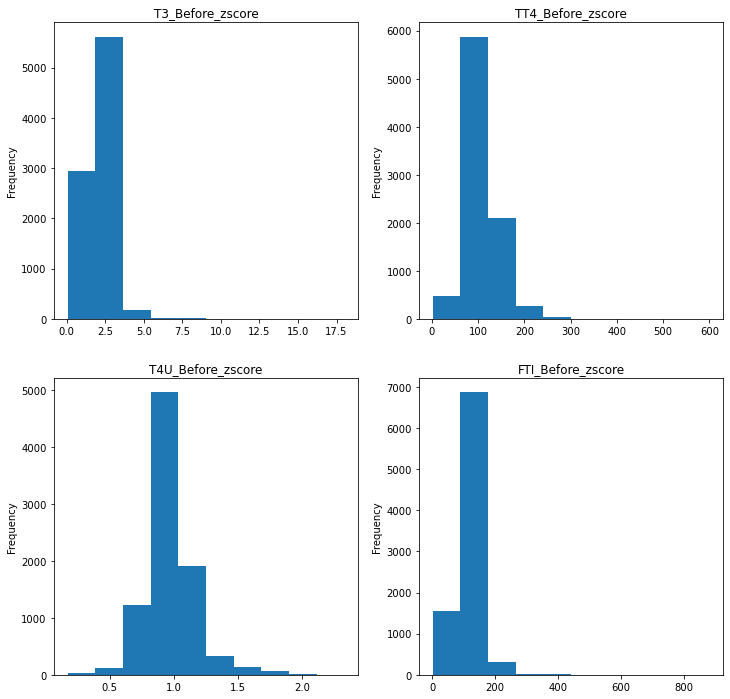

In [59]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
dataset1['T3'].plot(kind='hist',title= 'T3_Before_zscore')
plt.subplot(2,2,2)
# dataset1['TT4'].plot(kind='hist',title= 'TT4_Before_zscore',color='brown',alpha = 0.5)
dataset1['TT4'].plot(kind='hist',title= 'TT4_Before_zscore')
plt.subplot(2,2,3)
dataset1['T4U'].plot(kind='hist',title= 'T4U_Before_zscore')
plt.subplot(2,2,4)
dataset1['FTI'].plot(kind='hist',title= 'FTI_Before_zscore')


In [60]:
# plt.figure(figsize=(16,5))
# plt.subplot(1,2,1)
# sns.distplot(dataset1['TT4'])
# plt.subplot(1,2,2)
# sns.distplot(dataset1['FTI'])
# plt.show()

In [61]:
# col=['T3','TT4','T4U','FTI']
# for i in col:
    
#     d[i].plot(kind='hist',title='After')
#     plt.show()


In [62]:
features =['T3','TT4','T4U','FTI']

In [63]:
for feature in features:
    upper_limit = dataset1[feature].mean() + 3*dataset1[feature].std()
    lower_limit = dataset1[feature].mean() - 3*dataset1[feature].std()
    dataset1[feature] = np.where(dataset1[feature]>upper_limit,upper_limit,
                                          np.where(dataset1[feature]<lower_limit,lower_limit,
                                                            dataset1[feature]))
                                            
                                            


In [64]:
dataset1[['T3','TT4','T4U','FTI']].describe()

,T3,TT4,T4U,FTI
count,8786.000000,8786.000000,8786.000000,8786.000000
mean,1.922357,107.940026,0.970927,112.263216
std,0.628652,33.998746,0.177548,32.674449
min,0.050000,2.000000,0.401172,1.400000
25%,1.700000,88.000000,0.870000,95.000000
50%,1.900000,104.000000,0.960000,109.000000
75%,2.100000,124.000000,1.050000,126.000000
max,4.194698,218.286949,1.546495,232.830705


<AxesSubplot:title={'center':'FTI_After_zscore'}, ylabel='Frequency'>

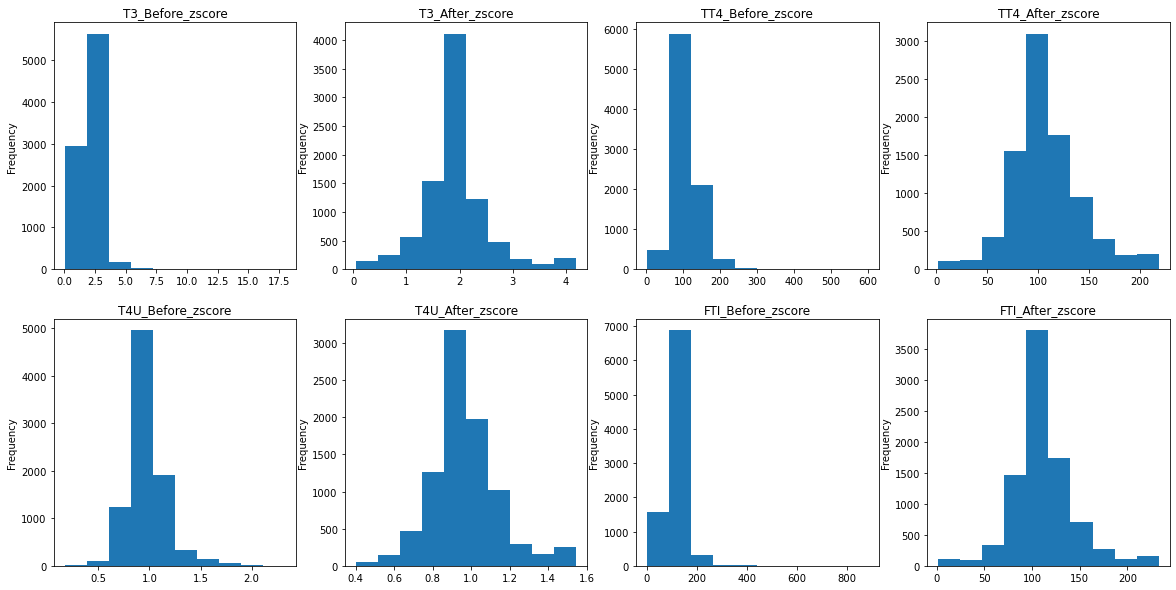

In [65]:
plt.figure(figsize=(20,10))

plt.subplot(2,4,1)
df_hist['T3'].plot(kind='hist',title= 'T3_Before_zscore')
plt.subplot(2,4,2)
dataset1['T3'].plot(kind='hist',title= 'T3_After_zscore')

plt.subplot(2,4,3)
# dataset1['TT4'].plot(kind='hist',title= 'TT4_Before_zscore',color='brown',alpha = 0.5)
df_hist['TT4'].plot(kind='hist',title= 'TT4_Before_zscore')
plt.subplot(2,4,4)
dataset1['TT4'].plot(kind='hist',title= 'TT4_After_zscore')

plt.subplot(2,4,5)
df_hist['T4U'].plot(kind='hist',title= 'T4U_Before_zscore')
plt.subplot(2,4,6)
dataset1['T4U'].plot(kind='hist',title= 'T4U_After_zscore')

plt.subplot(2,4,7)
df_hist['FTI'].plot(kind='hist',title= 'FTI_Before_zscore')
plt.subplot(2,4,8)
dataset1['FTI'].plot(kind='hist',title= 'FTI_After_zscore')


In [66]:
# plt.figure(figsize=(20,10))

# plt.subplot(2,4,1)
# sns.distplot(df_hist['T3'])
# plt.title('T3_Before_zscore')
# plt.subplot(2,4,2)
# sns.distplot(dataset1['T3'])
# plt.title('T3_After_zscore')
# plt.subplot(2,4,3)
# # dataset1['TT4'].plot(kind='hist',title= 'TT4_Before_zscore',color='brown',alpha = 0.5)
# df_hist['TT4'].plot(kind='hist',title= 'TT4_Before_zscore')
# plt.subplot(2,4,4)
# dataset1['TT4'].plot(kind='hist',title= 'TT4_After_zscore')

# plt.subplot(2,4,5)
# df_hist['T4U'].plot(kind='hist',title= 'T4U_Before_zscore')
# plt.subplot(2,4,6)
# dataset1['T4U'].plot(kind='hist',title= 'T4U_After_zscore')

# plt.subplot(2,4,7)
# df_hist['FTI'].plot(kind='kde',title= 'FTI_Before_zscore')
# plt.subplot(2,4,8)
# dataset1['FTI'].plot(kind='hist',title= 'FTI_After_zscore')


C:\Users\DKG\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DKG\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


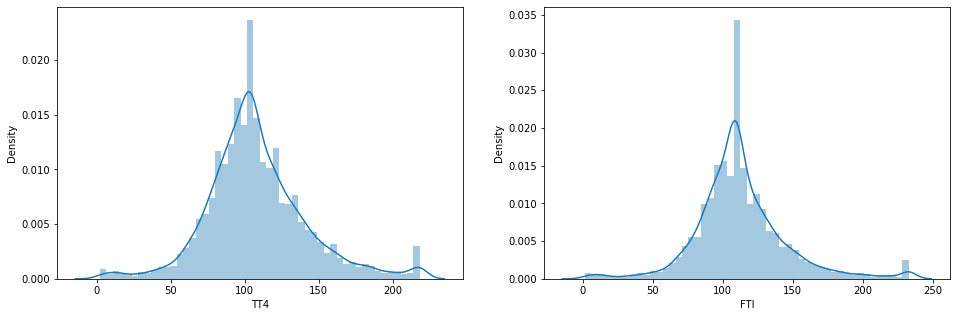

In [67]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sns.distplot(dataset1['TT4'])
plt.subplot(1,2,2)
sns.distplot(dataset1['FTI'])
plt.show()

C:\Users\DKG\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DKG\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


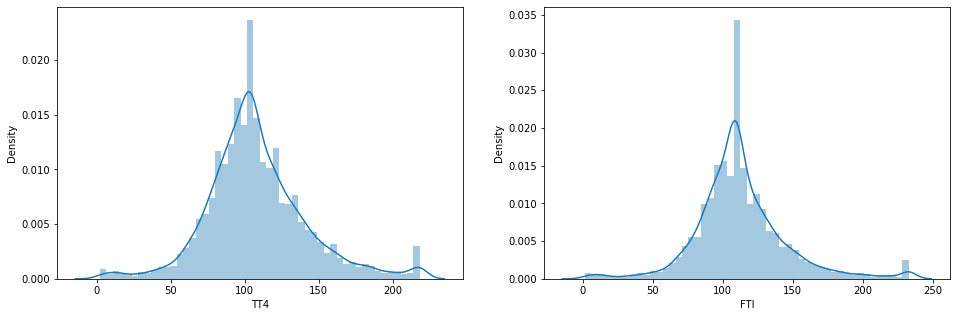

In [68]:
# warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(dataset1['TT4'])
plt.subplot(1,2,2)
sns.distplot(dataset1['FTI'])
plt.show()

###  Here we can see that we have handled outliers by capping  them with border values

## Categorical variables

In [69]:
cat_features = [feature for feature in dataset1.columns if dataset1[feature].dtypes=="O"]
print(cat_features,len(cat_features))

['sex', 'thyroxine', 'query_thyroxine', 'medication', 'sick', 'pregnant', 'surgery', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'referral_source'] 16


In [70]:
dataset1[cat_features].head()

,sex,thyroxine,query_thyroxine,medication,sick,pregnant,surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,referral_source
0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,other
1,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,other
2,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,other
3,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,other
4,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,other


In [71]:
for feature in cat_features:
    print(dataset1[feature].value_counts())

F    6131
M    2655
Name: sex, dtype: int64
f    7594
t    1192
Name: thyroxine, dtype: int64
f    8634
t     152
Name: query_thyroxine, dtype: int64
f    8674
t     112
Name: medication, dtype: int64
f    8448
t     338
Name: sick, dtype: int64
f    8685
t     101
Name: pregnant, dtype: int64
f    8658
t     128
Name: surgery, dtype: int64
f    8619
t     167
Name: I131_treatment, dtype: int64
f    8187
t     599
Name: query_hypothyroid, dtype: int64
f    8163
t     623
Name: query_hyperthyroid, dtype: int64
f    8693
t      93
Name: lithium, dtype: int64
f    8705
t      81
Name: goitre, dtype: int64
f    8560
t     226
Name: tumor, dtype: int64
f    8784
t       2
Name: hypopituitary, dtype: int64
f    8383
t     403
Name: psych, dtype: int64
other    5211
SVI      2343
SVHC      932
STMW      227
SVHD       70
WEST        3
Name: referral_source, dtype: int64


In [72]:
# dataset1.columns
dataset1.referral_source.nunique()

6

In [73]:
 dataset1= dataset1.replace({'F':1,'M':0,'t':1,'f':0})
dataset1.head()

,age,sex,thyroxine,query_thyroxine,medication,sick,pregnant,surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral_source,outcome
0,29,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.6,1.9,128.0,0.96,109.0,other,0
1,41,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1.4,1.9,104.0,0.96,109.0,other,0
2,36,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.4,1.9,104.0,0.96,109.0,other,0
3,32,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.4,1.9,104.0,0.96,109.0,other,1
4,60,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.4,1.9,104.0,0.96,109.0,other,0


In [74]:
# df = pd.get_dummies(df,columns=["referral source"])
# df.head()
dataset1=pd.get_dummies(dataset1,columns=['referral_source'],drop_first=True)
dataset1.head()

,age,sex,thyroxine,query_thyroxine,medication,sick,pregnant,surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,outcome,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_WEST,referral_source_other
0,29,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.6,1.9,128.0,0.96,109.0,0,0,0,0,0,1
1,41,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1.4,1.9,104.0,0.96,109.0,0,0,0,0,0,1
2,36,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.4,1.9,104.0,0.96,109.0,0,0,0,0,0,1
3,32,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.4,1.9,104.0,0.96,109.0,1,0,0,0,0,1
4,60,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.4,1.9,104.0,0.96,109.0,0,0,0,0,0,1


In [75]:
dataset1.sex.unique()

array([1, 0], dtype=int64)

In [76]:

dataset1['referral_source_SVI'] = dataset1['referral_source_SVI'].astype('int64')
dataset1['referral_source_SVHC'] = dataset1['referral_source_SVHC'].astype('int64')
dataset1['referral_source_WEST'] = dataset1['referral_source_WEST'].astype('int64')
dataset1['referral_source_SVHD'] = dataset1['referral_source_SVHD'].astype('int64')
dataset1['referral_source_other'] = dataset1['referral_source_other'].astype('int64')

In [77]:
dataset1.dtypes

age                        int64
sex                        int64
thyroxine                  int64
query_thyroxine            int64
medication                 int64
sick                       int64
pregnant                   int64
surgery                    int64
I131_treatment             int64
query_hypothyroid          int64
query_hyperthyroid         int64
lithium                    int64
goitre                     int64
tumor                      int64
hypopituitary              int64
psych                      int64
TSH                      float64
T3                       float64
TT4                      float64
T4U                      float64
FTI                      float64
outcome                    int64
referral_source_SVHC       int64
referral_source_SVHD       int64
referral_source_SVI        int64
referral_source_WEST       int64
referral_source_other      int64
dtype: object

In [78]:
# corr = dataset1.corr()
# corr

In [79]:
# plt.figure(figsize=(20,18))
# sns.heatmap(corr,annot=True,)

### 

features = ["FTI", "TSH", "TT4", "T4U"] # Permutation method of feature selection was used.
logging.info("Selected top 4 important features.")


In [80]:
from sklearn.model_selection import train_test_split

In [81]:
from sklearn.feature_selection import SelectKBest

In [82]:
from sklearn.feature_selection import chi2, f_regression


In [83]:
df= dataset1.copy()
X=df.drop(columns = 'outcome')
y = df['outcome']

In [84]:
# print(x,y)

In [85]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=19)

In [86]:
X_train

,age,sex,thyroxine,query_thyroxine,medication,sick,pregnant,surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_WEST,referral_source_other
4929,61,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.29,1.5,119.0,0.90,132.0,0,0,0,0,1
3281,59,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.40,1.6,113.0,0.99,114.0,0,0,1,0,0
3331,56,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.40,1.7,86.0,0.91,95.0,0,0,0,0,1
5412,55,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.70,2.0,102.0,0.96,106.0,1,0,0,0,0
8297,76,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.80,1.6,123.0,0.96,128.0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6746,77,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.80,1.1,131.0,1.04,126.0,0,0,1,0,0
1085,37,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1.40,1.9,104.0,0.96,109.0,0,0,0,0,1
5259,57,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.20,1.9,100.0,1.00,100.0,0,0,0,0,1
1437,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.90,1.2,98.0,1.03,95.0,0,0,1,0,0


In [87]:
y_train

4929    0
3281    0
3331    0
5412    0
8297    0
       ..
6746    1
1085    0
5259    0
1437    0
786     0
Name: outcome, Length: 7028, dtype: int64

In [201]:
# To perform chi2 test
f_p_values = chi2(X_train,y_train)
f_p_values


(array([9.72387676e+01, 1.73316362e+01, 3.31863291e+01, 8.72790175e-02,
        2.40639393e+00, 4.03383254e-02, 8.77455211e+01, 2.07880198e+00,
        1.47645880e-01, 2.63149244e+01, 4.71105061e+00, 7.39658156e+00,
        6.60580806e+00, 1.22433713e+00, 2.79481641e+00, 3.55657524e+01,
        8.30410694e+02, 1.25915056e+01, 7.80391990e+02, 1.40277542e+00,
        3.34427003e+02, 7.59272869e+01, 5.65830777e-02, 1.71204265e+01,
        7.53458116e-02, 5.97922859e-01]),
 array([6.14516243e-023, 3.13917029e-005, 8.37371815e-009, 7.67665247e-001,
        1.20840443e-001, 8.40820531e-001, 7.44413019e-021, 1.49357360e-001,
        7.00795268e-001, 2.90038712e-007, 2.99693310e-002, 6.53479433e-003,
        1.01646666e-002, 2.68511164e-001, 9.45695973e-002, 2.46584909e-009,
        1.31941375e-182, 3.87503865e-004, 9.89148465e-172, 2.36259428e-001,
        1.04375703e-074, 2.94304908e-018, 8.11980390e-001, 3.50829524e-005,
        7.83706616e-001, 4.39371649e-001]))

In [217]:
# F_Values=pd.Series(f_p_values[0])

In [216]:
# F_Values

In [215]:
# F_Values.index = X_train.columns
# F_Values

In [214]:
# F_Values.sort_values()

In [89]:
p_values = pd.Series(f_p_values[1])
p_values.index = X_train.columns
p_values

age                       6.145162e-23
sex                       3.139170e-05
thyroxine                 8.373718e-09
query_thyroxine           7.676652e-01
medication                1.208404e-01
sick                      8.408205e-01
pregnant                  7.444130e-21
surgery                   1.493574e-01
I131_treatment            7.007953e-01
query_hypothyroid         2.900387e-07
query_hyperthyroid        2.996933e-02
lithium                   6.534794e-03
goitre                    1.016467e-02
tumor                     2.685112e-01
hypopituitary             9.456960e-02
psych                     2.465849e-09
TSH                      1.319414e-182
T3                        3.875039e-04
TT4                      9.891485e-172
T4U                       2.362594e-01
FTI                       1.043757e-74
referral_source_SVHC      2.943049e-18
referral_source_SVHD      8.119804e-01
referral_source_SVI       3.508295e-05
referral_source_WEST      7.837066e-01
referral_source_other    

In [90]:
# top 6 important features are 
p_values.sort_values()

TSH                      1.319414e-182
TT4                      9.891485e-172
FTI                       1.043757e-74
age                       6.145162e-23
pregnant                  7.444130e-21
referral_source_SVHC      2.943049e-18
psych                     2.465849e-09
thyroxine                 8.373718e-09
query_hypothyroid         2.900387e-07
sex                       3.139170e-05
referral_source_SVI       3.508295e-05
T3                        3.875039e-04
lithium                   6.534794e-03
goitre                    1.016467e-02
query_hyperthyroid        2.996933e-02
hypopituitary             9.456960e-02
medication                1.208404e-01
surgery                   1.493574e-01
T4U                       2.362594e-01
tumor                     2.685112e-01
referral_source_other     4.393716e-01
I131_treatment            7.007953e-01
query_thyroxine           7.676652e-01
referral_source_WEST      7.837066e-01
referral_source_SVHD      8.119804e-01
sick                     

In [91]:
p_values.nsmallest(4)

TSH    1.319414e-182
TT4    9.891485e-172
FTI     1.043757e-74
age     6.145162e-23
dtype: float64

In [189]:
X_train_new = X_train[['TSH','TT4','FTI','age','T3','T4U']]
X_train_new

,TSH,TT4,FTI,age,T3,T4U
4929,0.29,119.0,132.0,61,1.5,0.90
3281,0.40,113.0,114.0,59,1.6,0.99
3331,2.40,86.0,95.0,56,1.7,0.91
5412,1.70,102.0,106.0,55,2.0,0.96
8297,1.80,123.0,128.0,76,1.6,0.96
...,...,...,...,...,...,...
6746,1.80,131.0,126.0,77,1.1,1.04
1085,1.40,104.0,109.0,37,1.9,0.96
5259,2.20,100.0,100.0,57,1.9,1.00
1437,0.90,98.0,95.0,50,1.2,1.03


In [190]:
Xtest = X_test[['TSH','TT4','FTI','age','T3','T4U']]

In [182]:
# from sklearn.ensemble import ExtraTreesClassifier
# import matplotlib.pyplot as plt
# model =ExtraTreesClassifier()
# model.fit(X_train,y_train)

In [183]:
# ranked_feature=pd.Series(model.feature_importances_,index=X_train.columns)

In [96]:
# ranked_feature.nlargest(10).plot(kind='barh')

In [184]:
# ranked_feature.nlargest(6).index

In [185]:
# ranked_feature.index

In [186]:
# X_train_new =X_train[['TSH', 'T3', 'TT4', 'FTI', 'T4U', 'age']]

In [187]:
# Xtest = X_test[['TSH', 'T3', 'TT4', 'FTI', 'T4U', 'age']]

In [171]:
obj = SelectKBest(chi2, k=12)
obj.fit_transform(X_train,y_train)
filter = obj.get_support()
filter

array([ True,  True,  True, False, False, False,  True, False, False,
        True, False, False, False, False, False,  True,  True,  True,
        True, False,  True,  True, False,  True, False, False])

In [170]:
feature = X_train.columns
final_f = feature[filter]
print(final_f)

Index(['age', 'thyroxine', 'pregnant', 'psych', 'TSH', 'TT4', 'FTI',
       'referral_source_SVHC'],
      dtype='object')


In [173]:
X_train_new = X_train[final_f]

In [174]:
Xtest = X_test[final_f]

In [149]:
from sklearn.metrics import (accuracy_score,balanced_accuracy_score,
                            cohen_kappa_score,precision_score,recall_score,
                             f1_score,roc_curve,roc_auc_score)

In [150]:
from sklearn.metrics import classification_report

In [151]:
from sklearn.linear_model import LogisticRegression

In [191]:
X_train_new

,TSH,TT4,FTI,age,T3,T4U
4929,0.29,119.0,132.0,61,1.5,0.90
3281,0.40,113.0,114.0,59,1.6,0.99
3331,2.40,86.0,95.0,56,1.7,0.91
5412,1.70,102.0,106.0,55,2.0,0.96
8297,1.80,123.0,128.0,76,1.6,0.96
...,...,...,...,...,...,...
6746,1.80,131.0,126.0,77,1.1,1.04
1085,1.40,104.0,109.0,37,1.9,0.96
5259,2.20,100.0,100.0,57,1.9,1.00
1437,0.90,98.0,95.0,50,1.2,1.03


In [192]:
Xtest

,TSH,TT4,FTI,age,T3,T4U
8263,5.41,69.000000,72.000000,34,1.9,0.960000
1603,4.40,218.286949,232.830705,57,2.8,0.401172
3078,1.10,81.000000,84.000000,62,2.4,0.970000
5651,5.41,96.000000,98.000000,75,1.5,0.980000
2562,1.40,104.000000,109.000000,60,1.9,0.960000
...,...,...,...,...,...,...
4284,1.40,147.000000,99.000000,29,3.4,1.490000
6310,1.40,148.000000,174.000000,65,1.9,0.850000
8531,3.50,177.000000,177.000000,50,2.1,1.000000
5373,0.90,113.000000,125.000000,54,1.9,0.900000


In [193]:
y_train

4929    0
3281    0
3331    0
5412    0
8297    0
       ..
6746    1
1085    0
5259    0
1437    0
786     0
Name: outcome, Length: 7028, dtype: int64

In [194]:
model = LogisticRegression()
LR = model.fit(X_train_new,y_train)

y_pred = model.predict(Xtest)

acc = accuracy_score(y_pred,y_test)*100
print('accuracy score is {} %'.format(acc))


accuracy score is 77.64505119453925 %


C:\Users\DKG\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [195]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
clf = tree.fit(X_train_new,y_train)
treepredict = clf.predict(Xtest)
acc = accuracy_score(treepredict,y_test)*100
print('accuracy score is {} %'.format(acc))

accuracy score is 91.01251422070534 %


In [196]:
# from sklearn import tree
# features =['FTI','I131_treatment','T3','T4U','TSH','TT4']

In [197]:
# tree.plot_tree(clf,feature_names=features,filled=True,fontsize=7)

In [198]:
from sklearn.svm import SVC
svm = SVC(probability=True)
sclf = svm.fit(X_train_new,y_train)
svc_pred = sclf.predict(Xtest)
acc = accuracy_score(svc_pred,y_test)*100
print('accuracy score is {} %'.format(acc))

accuracy score is 81.74061433447099 %


In [199]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
knnclf = neigh.fit(X_train_new,y_train)
knn_pred = knnclf.predict(Xtest)
acc = accuracy_score(knn_pred,y_test)*100
print('accuracy score is {} %'.format(acc))

accuracy score is 81.28555176336747 %


In [200]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rclf = rf.fit(X_train_new,y_train)
rf_pred = rclf.predict(Xtest)
acc = accuracy_score(rf_pred,y_test)*100
print('accuracy score is {} %'.format(acc))

accuracy score is 93.7428896473265 %


In [162]:
# from xgboost import XGBClassifier
# model = XGBClassifier(n_estimators =40,max_depth=3)
# xgb_clf = model.fit(X_train_new,y_train)
# xgb_pred = xgb_clf.predict(Xtest)
# acc = accuracy_score(xgb_pred,y_test)*100
# print('accuracy score is {} %'.format(acc))


In [163]:
# from sklearn.ensemble import ExtraTreesClassifier
# model =ExtraTreesClassifier()
# ext_clf =model.fit(X_train_new,y_train)
# ext_pred = ext_clf.predict(Xtest)
# acc = accuracy_score(ext_pred,y_test)*100
# print('accuracy score is {} %'.format(acc))

In [209]:
pred_prob1 = model.predict_proba(Xtest)
pred_prob2 = clf.predict_proba(Xtest)
pred_prob3 = sclf.predict_proba(Xtest)
pred_prob4 = knnclf.predict_proba(Xtest)
pred_prob5 = rclf.predict_proba(Xtest)

In [210]:
fpr1,tpr1,thresh1 = roc_curve(y_test,pred_prob1[:,1],pos_label=1)#logistic regression
fpr2,tpr2,thresh2 = roc_curve(y_test,pred_prob2[:,1],pos_label=1)#Decision Tree
fpr3,tpr3,thresh3 = roc_curve(y_test,pred_prob3[:,1],pos_label=1)#Support vector
fpr4,tpr4,thresh4 = roc_curve(y_test,pred_prob4[:,1],pos_label=1)#knn
fpr5,tpr5,thresh5 = roc_curve(y_test,pred_prob5[:,1],pos_label=1)#random forest

In [211]:
random_probs = [ 0 for i in range(len(y_test))]
p_fpr,p_tpr,_ = roc_curve(y_test,random_probs,pos_label=1)

In [212]:
# roc auc score
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test,pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test,pred_prob3[:,1])
auc_score4 = roc_auc_score(y_test,pred_prob4[:,1])
auc_score5 = roc_auc_score(y_test,pred_prob5[:,1])
print(auc_score1,auc_score2,auc_score3,auc_score4,auc_score5)

0.7361379202988791 0.8880318596928186 0.844824097135741 0.7927001176145012 0.9719627784696278


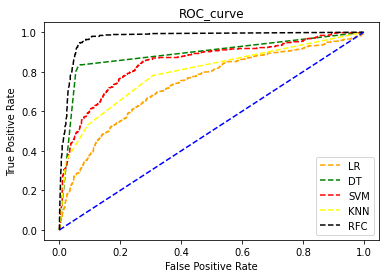

In [213]:
plt.plot(fpr1,tpr1,linestyle='--',color='orange',label='LR')
plt.plot(fpr2,tpr2,linestyle='--',color='green',label='DT')
plt.plot(fpr3,tpr3,linestyle='--',color='red',label='SVM')
plt.plot(fpr4,tpr4,linestyle='--',color='yellow',label='KNN')
plt.plot(fpr5,tpr5,linestyle='--',color='black',label='RFC')
plt.plot(p_fpr,p_tpr,linestyle='--',color='blue')
plt.title('ROC_curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()